# Loading Baby Names

In [3]:
import math
import collections
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
pd.options.display.max_rows = 10

In [5]:
# unziping all files
# data from https://www.ssa.gov/oact/babynames/limits.html
zipfile.ZipFile('names1.zip').extractall('.')

In [6]:
open('yob2021.txt','r').readlines()[:10]

['Olivia,F,17728\n',
 'Emma,F,15433\n',
 'Charlotte,F,13285\n',
 'Amelia,F,12952\n',
 'Ava,F,12759\n',
 'Sophia,F,12496\n',
 'Isabella,F,11201\n',
 'Mia,F,11096\n',
 'Evelyn,F,9434\n',
 'Harper,F,8388\n']

In [7]:
pd.read_csv('yob2021.txt')

,Olivia,F,17728
0,Emma,F,15433
1,Charlotte,F,13285
2,Amelia,F,12952
3,Ava,F,12759
4,Sophia,F,12496
...,...,...,...
31531,Zyeire,M,5
31532,Zyel,M,5
31533,Zyian,M,5
31534,Zylar,M,5


In [8]:
# Renaming columns 
pd.read_csv('yob2021.txt', names=['name','sex','number'])

,name,sex,number
0,Olivia,F,17728
1,Emma,F,15433
2,Charlotte,F,13285
3,Amelia,F,12952
4,Ava,F,12759
...,...,...,...
31532,Zyeire,M,5
31533,Zyel,M,5
31534,Zyian,M,5
31535,Zylar,M,5


In [9]:
# load CSV file as DataFrame, then create a new column "year" with all elements set to 2021
pd.read_csv('yob2021.txt', names=['name','sex','number']).assign(year=2021)

,name,sex,number,year
0,Olivia,F,17728,2021
1,Emma,F,15433,2021
2,Charlotte,F,13285,2021
3,Amelia,F,12952,2021
4,Ava,F,12759,2021
...,...,...,...,...
31532,Zyeire,M,5,2021
31533,Zyel,M,5,2021
31534,Zyian,M,5,2021
31535,Zylar,M,5,2021


In [10]:
# for each year in 1880-2021, load the corresponding CSV file names/yobXXXX.txt
# as DataFrame, create new column "year" with all elements set to loop variable,
# then concatenate all DataFrames into a single one
allyears = pd.concat(pd.read_csv(f'yob{year}.txt',
                                 names=['name','sex','number']).assign(year=year)
                     for year in range(1880, 2022))

In [11]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052781 entries, 0 to 31536
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   number  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 78.3+ MB


In [12]:
# the data range for years
allyears.year.min(), allyears.year.max()

(1880, 2021)

In [13]:
# save DataFrame to compressed CSV file, dropping uninteresting index
allyears.to_csv('allyears.csv.gz', index=False)

In [14]:
allyears = pd.read_csv('allyears.csv.gz')

In [53]:
allyears.tail()

,name,sex,number,year
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021
2052780,Zyn,M,5,2021


In [56]:
allyears.groupby('year')

In [57]:
# indexing by sex, name & year
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

In [58]:
allyears_indexed.head()

number
sex name  year        
F   Aabha 2011       7
          2012       5
          2014       9
          2015       7
          2016       7

In [59]:
# looking at Female Mary as an example
allyears_indexed.loc[('F','Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
...,...
2018,2355
2019,2226
2020,2210
2021,2080


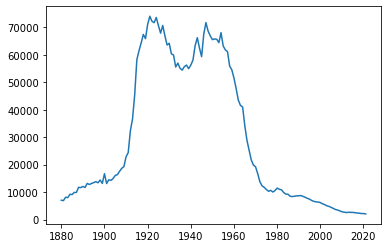

In [60]:
# female Mary from 1880 - 2021
pp.plot(allyears_indexed.loc[('F','Mary')])

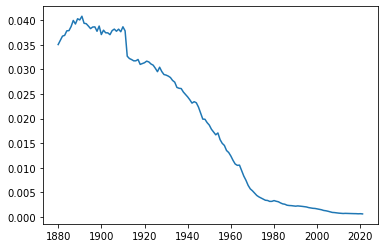

In [61]:
# normalize F/Mary time series by the total number of births each year
pp.plot(allyears_indexed.loc[('F','Mary')] / allyears.groupby('year').sum())

In [62]:
# plot number of sex/name babies as a function of year

def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    
    pp.plot(data.index, data.values, label=name)
    pp.axis(xmin=1880, xmax=2021)

In [63]:
# combine several "plotname()" plots for given sex and list of names

def comparenames(sex, names):
    pp.figure(figsize=(12,2.5))

    for name in names:
        plotname(sex, name)

    pp.legend()

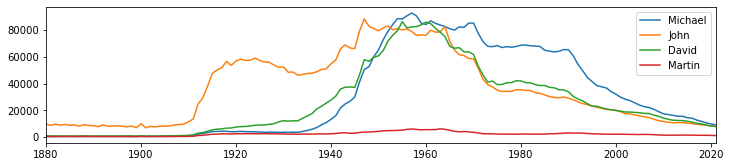

In [67]:
# arbitrarily looking at male names over the years
comparenames('M', ['Michael','John','David','Martin'])

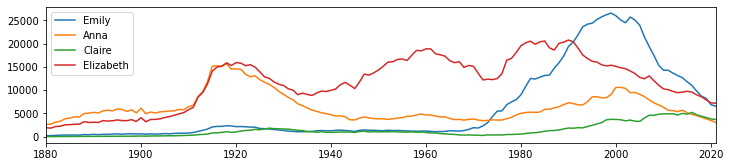

In [68]:
# arbitrarily looking at female names over the years
comparenames('F', ['Emily','Anna','Claire','Elizabeth'])

In [69]:
# subset of similar names
claires = ['Claire','Clare','Clara','Chiara','Ciara']

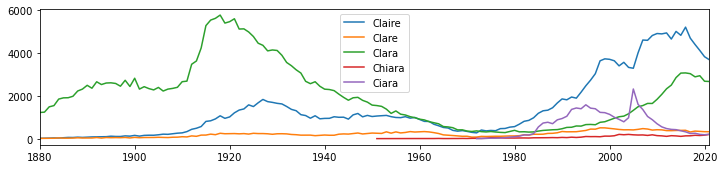

In [70]:
comparenames('F', claires)

# Year Top Ten Names

In [71]:
allyears_byyear = allyears.set_index(['sex','year']).sort_index()

In [85]:
# get the top ten names for sex and year

def getyear(sex, year):
    return (allyears_byyear.loc[sex, year]             # select M/F, year
               .sort_values('number', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [77]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2022)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam,Liam,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah,Noah,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William,Oliver,Oliver,Oliver
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James,William,Elijah,Elijah
4,William,Noah,William,William,William,William,James,Logan,Oliver,Elijah,William,James
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin,James,James,William
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah,Benjamin,Benjamin,Benjamin
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas,Lucas,Lucas,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Jacob,Mason,Mason,Henry,Henry
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Oliver,Logan,Alexander,Alexander,Theodore


In [78]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2022)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma,Olivia,Olivia,Olivia
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia,Emma,Emma,Emma
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava,Ava,Ava,Charlotte
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella,Sophia,Charlotte,Amelia
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia,Isabella,Sophia,Ava
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte,Charlotte,Amelia,Sophia
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia,Amelia,Isabella,Isabella
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia,Mia,Mia,Mia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper,Harper,Evelyn,Evelyn
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn,Evelyn,Harper,Harper


In [81]:
# similar to plotname function, but using a query on unindexed data
def plotname(sex, name):
    data = allyears.query('sex == @sex and name == @name')
    
    pp.plot(data.year, data.number, label=name)
    pp.axis(xmin=1880, xmax=2021)

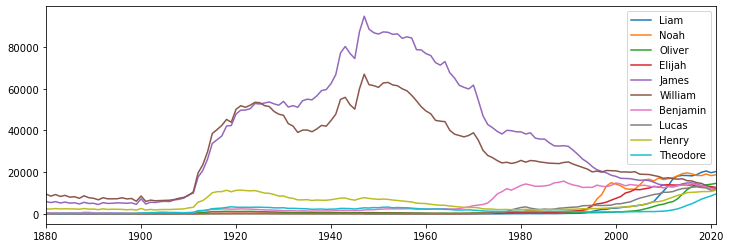

In [83]:
pp.figure(figsize=(12,4))

for name in getyear('M',2021):
    plotname('M', name)

pp.legend()

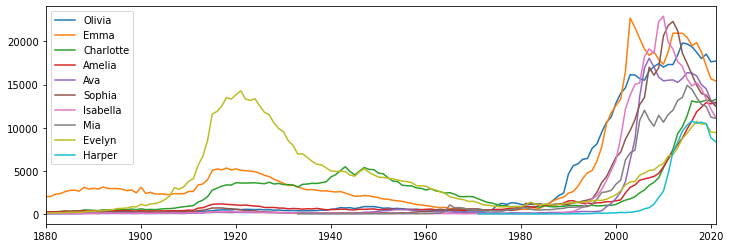

In [84]:
pp.figure(figsize=(12,4))

for name in getyear('F',2021):
    plotname('F', name)

pp.legend()

In [97]:
# top 10 male popular names in 2021
list(getyear('M',2021))

['Liam',
 'Noah',
 'Oliver',
 'Elijah',
 'James',
 'William',
 'Benjamin',
 'Lucas',
 'Henry',
 'Theodore']

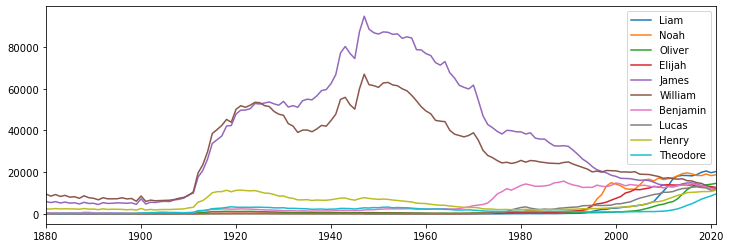

In [94]:
pp.figure(figsize=(12,4))

for name in ['Liam','Noah','Oliver','Elijah','James','William','Benjamin','Lucas','Henry', 'Theodore']:
    plotname('M', name)

pp.legend()

In [90]:
# top 10 female popular names in 2021
list(getyear('F',2021))

['Olivia',
 'Emma',
 'Charlotte',
 'Amelia',
 'Ava',
 'Sophia',
 'Isabella',
 'Mia',
 'Evelyn',
 'Harper']

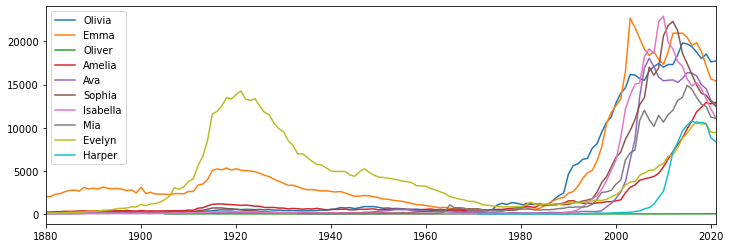

In [96]:
pp.figure(figsize=(12,4))

for name in ['Olivia','Emma','Oliver','Amelia','Ava','Sophia','Isabella','Mia','Evelyn', 'Harper']:
    plotname('F', name)

pp.legend()

In [108]:
# get all time favorites: select M, group by name, sum over years, sort, cap 
alltime_m = allyears_byyear.loc['M'].groupby('name').sum().sort_values('number', ascending=False).head(10)
alltime_m

,number
name,
James,5202714
John,5150510
Robert,4834094
Michael,4392696
William,4156142
David,3646903
Joseph,2639396
Richard,2571082
Charles,2411608


In [109]:
# get all time favorites: select F, group by name, sum over years, sort, cap 
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)
alltime_f

,number
name,
Mary,4132497
Elizabeth,1661030
Patricia,1572795
Jennifer,1469379
Linda,1453755
Barbara,1435386
Margaret,1255686
Susan,1122518
Dorothy,1109423


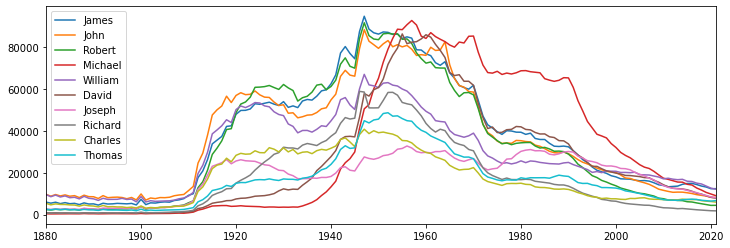

In [110]:
# all time favorite female names overtime
pp.figure(figsize=(12,4))

for name in alltime_m.index:
    plotname('M', name)

pp.legend()

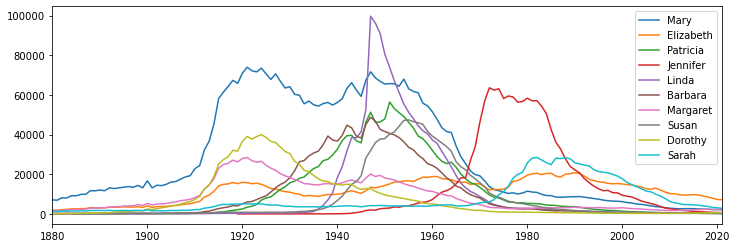

In [111]:
# all time favorite female names overtime
pp.figure(figsize=(12,4))

for name in alltime_f.index:
    plotname('F', name)

pp.legend()

# Popular Unisex names

In [16]:
# total number across all years, grouped by sex and name
totals = allyears.groupby(['sex','name']).number.sum()
totals

sex  name     
F    Aabha        51
     Aabidah       5
     Aabriella    51
     Aada         13
     Aadaya        9
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 112620, dtype: int64

In [17]:
# split into male and female totals
male, female = totals.loc['M'], totals.loc['F']

In [18]:
male

name
Aaban     120
Aabid      16
Aabir      10
Aadam     320
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 43093, dtype: int64

In [19]:
female

name
Aabha        51
Aabidah       5
Aabriella    51
Aada         13
Aadaya        9
             ..
Zyrielle     32
Zyrihanna    50
Zyriyah      16
Zyva         38
Zyyanna       6
Name: number, Length: 69527, dtype: int64

In [20]:
totals.loc['M'] / totals.loc['F'] < 2

name
Aaban      False
Aabha      False
Aabid      False
Aabidah    False
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: number, Length: 101338, dtype: bool

In [21]:
# compute ratio of male and female totals (Pandas aligns axes automatically);
# drop NaNs that occur where only one Series has a value
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

In [22]:
ratios[(ratios > 0.5) & (ratios < 2)]

name
Aalijah    1.724832
Aamari     1.645833
Aari       1.320000
Aaris      1.150000
Aaryn      0.561883
             ...   
Ziyan      1.239766
Zohar      0.540698
Zyian      0.816327
Zyn        1.153846
Zyrie      1.500000
Name: number, Length: 1715, dtype: float64

In [23]:
# names that fit the unisex ratio constraint
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index

In [24]:
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aaris', 'Aaryn', 'Aavyn', 'Abey', 'Abrar',
       'Abriel', 'Adair',
       ...
       'Zi', 'Ziel', 'Zihan', 'Zikora', 'Zixuan', 'Ziyan', 'Zohar', 'Zyian',
       'Zyn', 'Zyrie'],
      dtype='object', name='name', length=1715)

In [25]:
# sorted and capped M + F totals for unisex names;
# results in array of top ten unisex counts, indexed by name
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

In [26]:
common

name
Jessie     279340
Riley      221666
Casey      189515
Jackie     169612
Peyton     131004
Jaime      119524
Kerry       98380
Kendall     97190
Jody        87158
Frankie     76330
Name: number, dtype: int64

In [27]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

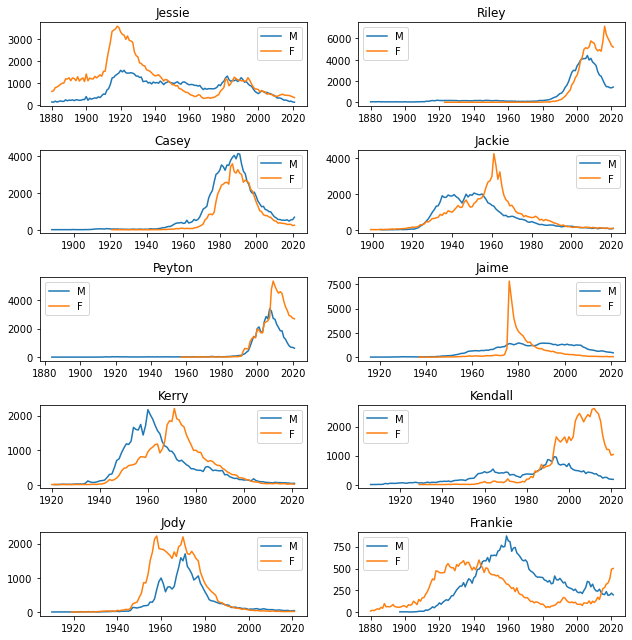

In [28]:
pp.figure(figsize=(9,9))

# loop over top-ten unisex names
for i, name in enumerate(common.index):
    pp.subplot(5,2,i+1)

    pp.plot(allyears_indexed.loc['M',name], label='M')
    pp.plot(allyears_indexed.loc['F',name], label='F')
    
    pp.legend()
    pp.title(name)

# improve subplot spacing
pp.tight_layout()